In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('data/application_record.csv')

In [3]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
df.shape

(438557, 18)

In [5]:
df1=pd.read_csv('data/credit_record.csv')

In [6]:
df1.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [8]:
df['ID'].duplicated().sum()

47

In [9]:
# Drop duplicates
#df=df.drop_duplicates(subset=df.columns[1:], keep='first')
df = df.drop_duplicates(subset='ID',keep='first')

In [10]:
df.describe(include='all')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
count,4.385100e+05,438510,438510,438510,438510.000000,4.385100e+05,438510,438510,438510,438510,438510.000000,438510.000000,438510.0,438510.000000,438510.000000,438510.000000,304317,438510.000000
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN
freq,NaN,294406,275427,304040,NaN,NaN,226076,301788,299798,393791,NaN,NaN,NaN,NaN,NaN,NaN,78231,NaN
mean,6.022035e+06,NaN,NaN,NaN,0.427381,1.875254e+05,NaN,NaN,NaN,NaN,-15998.022996,60566.188769,1.0,0.206128,0.287770,0.108200,NaN,2.194463
std,5.714962e+05,NaN,NaN,NaN,0.724874,1.100893e+05,NaN,NaN,NaN,NaN,4185.016222,138770.072835,0.0,0.404524,0.452724,0.310634,NaN,0.897192
min,5.008804e+06,NaN,NaN,NaN,0.000000,2.610000e+04,NaN,NaN,NaN,NaN,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000
25%,5.609362e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19484.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
50%,6.047720e+06,NaN,NaN,NaN,0.000000,1.609402e+05,NaN,NaN,NaN,NaN,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
75%,6.454161e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,NaN,3.000000


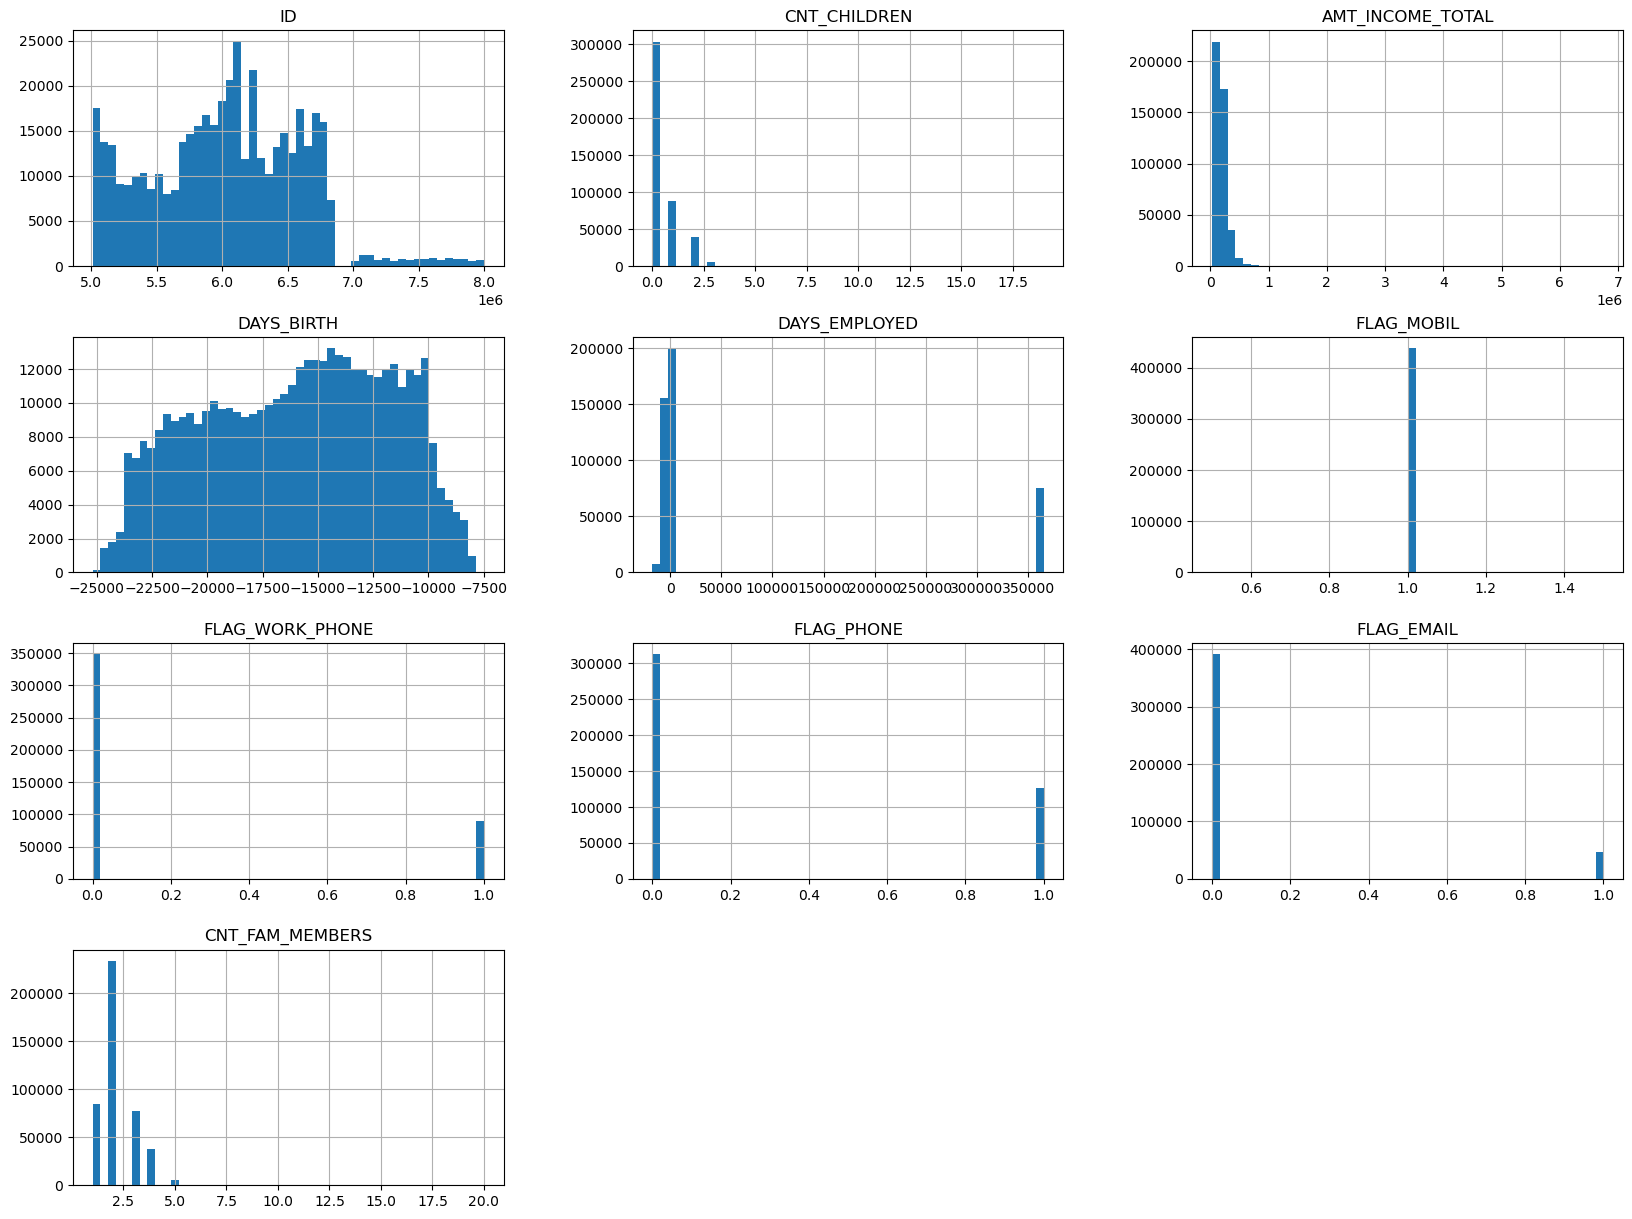

In [11]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

df.hist(bins=50, figsize=(20, 15));

In [12]:
df.shape

(438510, 18)

In [13]:
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134193
CNT_FAM_MEMBERS             0
dtype: int64

In [14]:
df['OCCUPATION_TYPE'].value_counts(dropna=False)

OCCUPATION_TYPE
NaN                      134193
Laborers                  78231
Core staff                43000
Sales staff               41094
Managers                  35481
Drivers                   26090
High skill tech staff     17285
Accountants               15983
Medicine staff            13518
Cooking staff              8076
Security staff             7993
Cleaning staff             5843
Private service staff      3455
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: count, dtype: int64

In [15]:
df['OCCUPATION_TYPE'].fillna('not_specified',inplace=True)

In [16]:
df['OCCUPATION_TYPE'].value_counts(dropna=False)

OCCUPATION_TYPE
not_specified            134193
Laborers                  78231
Core staff                43000
Sales staff               41094
Managers                  35481
Drivers                   26090
High skill tech staff     17285
Accountants               15983
Medicine staff            13518
Cooking staff              8076
Security staff             7993
Cleaning staff             5843
Private service staff      3455
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: count, dtype: int64

In [17]:
df[df['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts()

DAYS_EMPLOYED
365243    75324
Name: count, dtype: int64

In [18]:
df['AGE_YEARS']=round(-df['DAYS_BIRTH']/365)
# Create years employed feature
df['YEARS_EMPLOYED']=round(-df['DAYS_EMPLOYED']/365)
df['YEARS_EMPLOYED'] = df['YEARS_EMPLOYED'].apply(lambda x: max(x, 0))

In [19]:
df.drop(columns=["DAYS_BIRTH","DAYS_EMPLOYED"],inplace=True)

In [20]:
df1.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [22]:
df1.MONTHS_BALANCE.unique()

array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12,
       -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25,
       -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38,
       -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51,
       -52, -53, -54, -55, -56, -57, -58, -59, -60])

In [23]:
df1.STATUS.unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [24]:
df1['STATUS'].replace(['X', 'C'], '0', inplace=True)
df1['STATUS']=df1['STATUS'].astype(int)
df1.loc[df1['STATUS']>=1,'STATUS']=1

In [25]:
df1.STATUS.unique()

array([0, 1])

In [26]:
df1["STATUS"].value_counts()

STATUS
0    1034381
1      14194
Name: count, dtype: int64

In [27]:
new_df=pd.merge(df, df1, how='inner', on=['ID'])

In [28]:
new_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,not_specified,2.0,33.0,12.0,0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,not_specified,2.0,33.0,12.0,-1,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,not_specified,2.0,33.0,12.0,-2,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,not_specified,2.0,33.0,12.0,-3,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,not_specified,2.0,33.0,12.0,-4,0


In [29]:
new_df.shape

(777715, 20)

In [30]:
X=new_df.iloc[:, :-1]
Y=new_df.iloc[:, -1].values

# Splitting the dataset (X = data, y = output) into the Training set and Test set

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
columns_to_scale = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AGE_YEARS','YEARS_EMPLOYED', 'CNT_FAM_MEMBERS']
X[columns_to_scale] = sc.fit_transform(X[columns_to_scale]) 

In [32]:
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Xác định các đặc trưng cần được xử lý
categorical_features_onehot = ['CODE_GENDER','FLAG_OWN_CAR','NAME_EDUCATION_TYPE', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',\
                               'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE']
# numerical_features = ["AGE_YEARS", "AMT_INCOME_TOTA"]
#Create preprocessing steps for each feature type
categorical_transformer_onehot = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore", drop="first", sparse=False))
    ])
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer_onehot, categorical_features_onehot)
    ],
    remainder="passthrough"
)

# Fit và transform DataFrame
X = preprocessor.fit_transform(X)

In [33]:
print(X)

[[  1.           1.           1.         ...  -0.994109     0.83983166
    0.        ]
 [  1.           1.           1.         ...  -0.994109     0.83983166
   -1.        ]
 [  1.           1.           1.         ...  -0.994109     0.83983166
   -2.        ]
 ...
 [  1.           0.           0.         ...  -1.70488569  -0.50521552
  -11.        ]
 [  1.           0.           0.         ...  -1.70488569  -0.50521552
  -12.        ]
 [  1.           0.           0.         ...  -1.70488569  -0.50521552
  -13.        ]]


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [35]:
X_train.shape

(622172, 49)

In [36]:
y_test.shape

(155543,)

In [37]:
X_train

array([[  1.        ,   1.        ,   1.        , ...,  -1.34949734,
         -0.05686646, -15.        ],
       [  0.        ,   1.        ,   0.        , ...,  -0.28333231,
          1.28818072,  -3.        ],
       [  0.        ,   1.        ,   0.        , ...,  -1.6160386 ,
         -0.35576583, -15.        ],
       ...,
       [  1.        ,   1.        ,   0.        , ...,  -0.81641483,
          1.28818072, -28.        ],
       [  0.        ,   0.        ,   0.        , ...,   1.76015066,
         -0.95356458,  -6.        ],
       [  1.        ,   1.        ,   1.        , ...,  -1.08295609,
          0.24203291, -18.        ]])

In [38]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

# Training Machine Learning Model

In [39]:
## Models from Scikit-Learn: Search "scikit learn model map"
from sklearn.linear_model import LogisticRegression
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)

LogisticRegression()

In [40]:
y_predict=logistic_clf.predict(X_test)

In [41]:
pd.DataFrame({'y':y_test,'y_pred':y_predict}).head()

,y,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [42]:
# Evaluate the model on the training set
logistic_clf.score(X_train, y_train)

0.9851648740219746

In [43]:
# Evaluate the model on the test set
logistic_clf.score(X_test,y_test)

0.9849237831339244

# Decision Tree¶

In [44]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [45]:
y1_predict=model.predict(X_test)

In [46]:
pd.DataFrame({'y':y_test,'y_pred':y1_predict}).head()

,y,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [47]:
# Evaluate the model on the training set
model.score(X_train, y_train)

1.0

In [48]:
# Evaluate the model on the test set
model.score(X_test,y_test)

0.9822299942781096

# Random Forest 

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [51]:
rf.score(X_train,y_train),rf.score(X_test,y_test)

(0.99998392727413, 0.9866082048051021)

# AdaBoost

In [53]:
from sklearn.ensemble import AdaBoostClassifier
model_AdaBoost=AdaBoostClassifier(base_estimator=
                                  DecisionTreeClassifier(random_state=0),
                                  n_estimators=100,
                              random_state=0)

#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=0),
                   n_estimators=100, random_state=0)

In [54]:
model_AdaBoost.score(X_train,y_train),model_AdaBoost.score(X_test,y_test)

(1.0, 0.9821914197360215)

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred = model_AdaBoost.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[151748   1450]
 [  1320   1025]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    153198
           1       0.41      0.44      0.43      2345

    accuracy                           0.98    155543
   macro avg       0.70      0.71      0.71    155543
weighted avg       0.98      0.98      0.98    155543

